In [33]:
# Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [16]:
data = pd.read_csv("premierleague1819/epl_1819_no_comma.csv")
display(data)

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,26581,112,1814,4240,783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,23638,98,2250,3416,721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,25070,146,1774,3874,692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,21295,87,2267,3191,643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,20805,65,2062,3102,605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3
5,Manchester United,Europa League,6,27,142512868,38,19,9,10,65,54,11,66,26,27.3,21,550440000,22017600,19202,63,2242,2634,638,200,526,225,4,9,55,10,73,4,4,2,122,128,355,581,2,785,370,6,53.3,82.3
6,Wolverhampton,Europa League Qualification,7,15,127165114,38,16,9,13,47,46,1,57,23,27.2,13,369600000,16068800,16618,51,2552,2515,622,195,477,152,10,4,44,3,72,1,5,2,100,148,501,720,2,824,464,4,47.4,78.2
7,Everton,No UEFA Competitions,8,18,128603905,38,15,9,14,54,46,8,54,26,27.0,16,305360000,11748000,16494,44,2310,2362,814,215,498,169,13,2,45,10,55,4,3,0,94,85,456,700,4,825,430,5,51.0,77.3
8,Leicester,No UEFA Competitions,9,15,123328078,38,15,7,16,51,48,3,52,26,29.0,18,284240000,10929600,17219,88,2335,2593,779,210,515,184,9,5,43,8,57,5,8,3,90,96,436,676,4,945,500,5,50.8,79.2
9,West Ham,No UEFA Competitions,10,16,122528663,38,15,7,16,52,55,-3,52,26,28.3,18,234212000,9011200,16358,75,2315,2273,630,188,441,157,10,5,47,5,59,1,3,0,148,141,457,723,5,855,397,5,49.0,78.7


# Predicting Points from Attack Statistics

## Loading Data

In [17]:
attack_stats = data.filter(['attack_passes','attack_passes_through','attack_passes_long', 'attack_passes_back', 'attack_crosses', 'attack_corners_taken', 'attack_shots', 'attack_shots_on_target', 'attack_goals_headed', 'attack_goals_penalty', 'attack_goals_box', 'attack_goals_outsidebox', 'attack_goals_counter', 'attack_goals_freekick', 'attack_posession', 'attack_passes_accuracy'], axis=1)


y = data.filter(['general_points'], axis=1)
display(attack_stats)


,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession
0,26581,112,1814,4240,783,298,683,260,12,3,80,15,5,2,64.0
1,23638,98,2250,3416,721,249,575,226,19,7,84,5,6,1,58.8
2,25070,146,1774,3874,692,215,607,198,8,5,54,9,1,1,59.9
3,21295,87,2267,3191,643,194,537,189,14,4,53,14,5,2,56.7
4,20805,65,2062,3102,605,209,467,170,5,4,62,11,3,3,56.1
5,19202,63,2242,2634,638,200,526,225,4,9,55,10,4,2,53.3
6,16618,51,2552,2515,622,195,477,152,10,4,44,3,5,2,47.4
7,16494,44,2310,2362,814,215,498,169,13,2,45,10,3,0,51.0
8,17219,88,2335,2593,779,210,515,184,9,5,43,8,8,3,50.8
9,16358,75,2315,2273,630,188,441,157,10,5,47,5,3,0,49.0


## Import utils for SVM model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVR
from sklearn import neighbors
# from sklearn.neighbors import KNeighborsRegressor as knn
import xgboost
from collections import OrderedDict

## Trial 1

In [19]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=50, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
knn = neighbors.KNeighborsRegressor(5, weights='uniform')


In [20]:
# Create test train split
x_train, x_test, y_train, y_test = train_test_split(attack_stats, y, test_size=0.2, random_state=2)


In [21]:
model = knn.fit(x_train, y_train)
yhat = model.predict(x_test)
print(yhat)
print(y_test)

[[42.8]
 [68.6]
 [56.2]
 [71.6]]
    general_points
12  45            
4   70            
18  26            
0   98            


## Trial 2

In [27]:
tree_regr = xgboost.XGBRegressor(max_depth=4, colsample_bylevel=0.5, reg_alpha=0.75, reg_lambda=0.5,n_estimators=10000)

tree_regr.fit(x_train, y_train)
yhat = tree_regr.predict(x_test)
print(yhat)
print(y_test)

[18:49:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[43.746574 67.967155 42.96634  90.73994 ]
    general_points
12  45            
4   70            
18  26            
0   98            


## Trial 3

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import sklearn

model = xgboost.XGBRegressor(max_depth=4,
                        objective="reg:squarederror", 
                        learning_rate=0.05, 
                        subsample=0.9, 
                        colsample_bylevel=0.5,
                        reg_alpha=0.75, 
                        reg_lambda=0.5,
                        n_estimators=10000)  
target = y
folds = KFold(n_splits=10, random_state=5)
attack_res = cross_val_score(model, attack_stats, target, cv=folds, scoring="neg_mean_squared_error")
print(attack_res)

print(attack_res.mean())

[-7.60011042e+02 -1.83682587e+02 -3.64706316e+00 -5.01987270e+01
 -3.53401736e+01 -1.29481490e+02 -7.65950408e+01 -2.47678285e-02
 -9.14709288e+01 -7.15224515e+02]
-204.56763356698303


## Attack Features

In [28]:
from xgboost import plot_importance

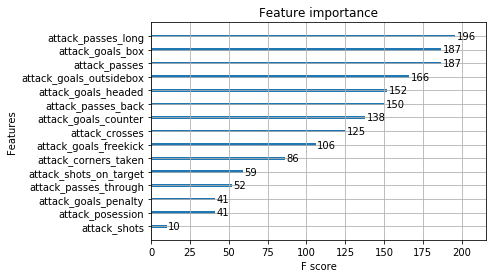

In [34]:
xtr_atk, xte_atk, ytr_atk, yte_atk = train_test_split(attack_stats, y, test_size=0.2, random_state=2)

attack_model = xgboost.XGBRegressor(max_depth=4,
                        objective="reg:squarederror", 
                        learning_rate=0.05, 
                        subsample=0.9, 
                        colsample_bylevel=0.5,
                        reg_alpha=0.75, 
                        reg_lambda=0.5,
                        n_estimators=10000)  
attack_model.fit(x_train, y_train)

plot_importance(attack_model)

plt.show()

## Defence Features

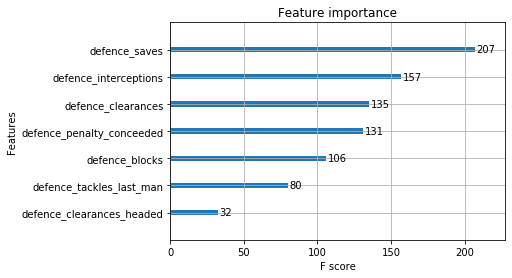

In [39]:
defence_stats = data.filter(["defence_saves", "defence_blocks", "defence_interceptions", "defence_tackle", "defence_tackles_last_man", "defence_clearances", "defence_clearances_headed", "defence_penalty_conceeded"])

defence_model = xgboost.XGBRegressor(max_depth=4,
                        objective="reg:squarederror", 
                        learning_rate=0.05, 
                        subsample=0.9, 
                        colsample_bylevel=0.5,
                        reg_alpha=0.75, 
                        reg_lambda=0.5,
                        n_estimators=10000)  

xtr_def, xte_def, ytr_def, yte_def = train_test_split(defence_stats, y, test_size=0.2, random_state=5)

defense_model.fit(xtr_def, ytr_def)

plot_importance(defense_model)
plt.show()


In [54]:
folds = KFold(n_splits=10, random_state=5)
def_res = cross_val_score(defence_model, defence_stats, target, cv=folds, scoring="neg_mean_squared_error")
print(def_res)

print(def_res.mean())


[ -823.98405141   -47.53063532  -235.82120377   -77.24271084
   -76.04819932    -6.56847813   -50.24724714   -43.97483989
   -33.03061772 -1547.43538545]
-294.1883368990617


## Minimal Features

In [56]:
minimal_features = data.filter(["attack_passes_long", "attack_goals_box", "attack_passes", "attack_goals_outside_box","attack_goals_head", "defence_saves", "defence_interceptions", "defence_clearances"])

xtr_min, xte_min, ytr_min, yte_min = train_test_split(minimal_features, y, test_size=0.2, random_state=5)
comb_model = xgboost.XGBRegressor(max_depth=5,
                        objective="reg:squarederror", 
                        learning_rate=0.05, 
                        subsample=0.9, 
                        colsample_bylevel=0.5,
                        reg_alpha=0.75, 
                        reg_lambda=0.5,
                        n_estimators=10000)  

folds = KFold(n_splits=10, random_state=5)
comb_res = cross_val_score(comb_model, minimal_features, target, cv=folds, scoring="neg_mean_squared_error")
print(comb_res)
print(comb_res.mean())


[-786.32387991  -10.91721461   -7.28303594  -53.94032171  -19.86943839
  -15.33949271  -97.00515239 -117.59452793  -87.04904708 -636.31738172]
-183.16394923574336


In [59]:
comb_model.fit(xtr_min, ytr_min)

yhat_min = comb_model.predict(xte_min)
print(yhat_min)
print(yte_min)

[77.80475  62.437683 31.149328 38.727543]
    general_points
2   72            
5   66            
17  34            
19  16            
